In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Cardiomyopathy
Feature ranking:
Cardiomyopathy 1. ccr (0.432924)
Cardiomyopathy 2. missense_depletion (0.218631)
Cardiomyopathy 3. vest (0.147921)
Cardiomyopathy 4. fathmm (0.099676)
Cardiomyopathy 5. missense_badness (0.054826)
Cardiomyopathy 6. is_domain (0.046023)


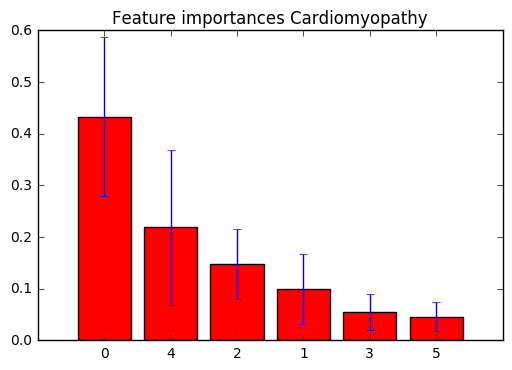

EPI
Feature ranking:
EPI 1. ccr (0.340406)
EPI 2. vest (0.317401)
EPI 3. fathmm (0.163914)
EPI 4. missense_depletion (0.098057)
EPI 5. missense_badness (0.048257)
EPI 6. is_domain (0.031965)


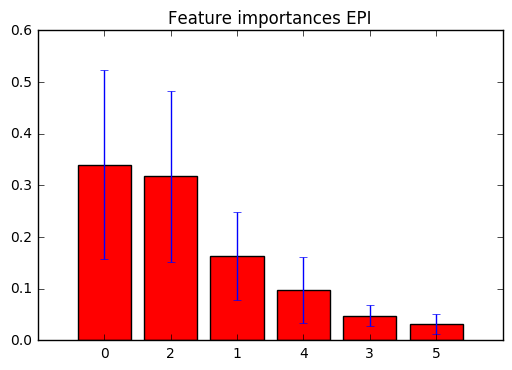

Rasopathies
Feature ranking:
Rasopathies 1. ccr (0.325495)
Rasopathies 2. vest (0.255516)
Rasopathies 3. missense_badness (0.151861)
Rasopathies 4. missense_depletion (0.117911)
Rasopathies 5. fathmm (0.116648)
Rasopathies 6. is_domain (0.032569)


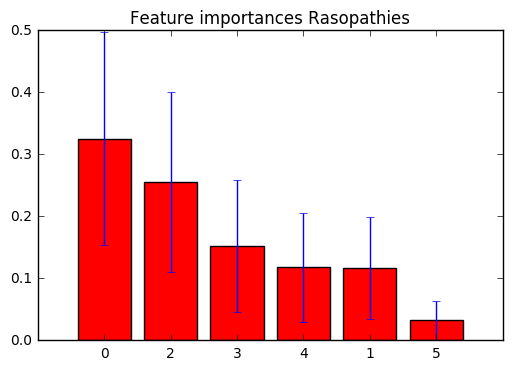

In [18]:
afile = '../data/interim/panel.dat'
df = pd.read_csv(afile, sep='\t')
cols = ['ccr', 'fathmm', 'vest', 'missense_badness', 'missense_depletion', 'is_domain']
for disease in set(df['Disease']):
    print(disease)
    X = df[df.Disease==disease][cols]
    y = df[df.Disease==disease]['y']

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%s %d. %s (%f)" % (disease, f + 1, cols[indices[f]], importances[indices[f]]))

    plt.figure()
    plt.title("Feature importances " + disease)
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()